# Jupyter tutorial

### (Adapted from tutorial "IPython: beyond plain Python")

When executing code in IPython, all valid Python syntax works as-is, but IPython provides a number of features designed to make the interactive experience more fluid and efficient.

## First things first: running code, getting help

In the notebook, to run a cell of code, hit `Shift-Enter`. This executes the cell and puts the cursor in the next cell below, or makes a new one if you are at the end.  Alternately, you can use:
    
- `Alt-Enter` to force the creation of a new cell unconditionally (useful when inserting new content in the middle of an existing notebook).
- `Control-Enter` executes the cell and keeps the cursor in the same cell, useful for quick experimentation of snippets that you don't need to keep permanently.

In [1]:
print("Hi")

Hi


Getting help:

In [2]:
?

Typing `object_name?` will print all sorts of details about any object, including docstrings, function definition lines (for call arguments) and constructor details for classes.

In [3]:
import collections
collections.namedtuple?

In [4]:
collections.Counter??

In [5]:
*int*?

An IPython quick reference card:

In [6]:
%quickref

## Tab completion

Tab completion, especially for attributes, is a convenient way to explore the structure of any object you’re dealing with. Simply type `object_name.<TAB>` to view the object’s attributes. Besides Python objects and keywords, tab completion also works on file and directory names.

In [ ]:
collections.

## The interactive workflow: input, output, history

In [7]:
2+10

12

In [8]:
_+10

22

You can suppress the storage and rendering of output if you append `;` to the last cell (this comes in handy when plotting with matplotlib, for example):

In [9]:
10+20;

In [10]:
_

22

The output is stored in `_N` and `Out[N]` variables:

In [11]:
_10 == Out[10]

True

Previous inputs are available, too:

In [13]:
In[11]

'_10 == Out[10]'

In [14]:
_i

'In[11]'

In [17]:
%history -n 1-5

   1: print("Hi")
   2: ?
   3:
import collections
collections.namedtuple?
   4: collections.Counter??
   5: *int*?


**Exercise**

Write the last 10 lines of history to a file named `log.py`.

## Accessing the underlying operating system

In [18]:
!pwd

/Users/minrk/dev/ip/mine/examples/IPython Kernel


In [19]:
files = !ls
print("My current directory's files:")
print(files)

My current directory's files:
['Animations Using clear_output.ipynb', 'Background Jobs.ipynb', 'Beyond Plain Python.ipynb', 'Capturing Output.ipynb', 'Cell Magics.ipynb', 'Custom Display Logic.ipynb', 'Index.ipynb', 'Old Custom Display Logic.ipynb', 'Plotting in the Notebook.ipynb', 'Raw Input in the Notebook.ipynb', 'Rich Output.ipynb', 'Script Magics.ipynb', 'SymPy.ipynb', 'Terminal Usage.ipynb', 'Third Party Rich Output.ipynb', 'Trapezoid Rule.ipynb', 'Working With External Code.ipynb', '__pycache__', 'data', 'example-demo.py', 'gui', 'ipython-completion.bash', 'ipython-get-history.py', 'ipython-qtconsole.desktop', 'ipython.desktop', 'mod.py', 'test.txt']


In [20]:
!echo $files

[Animations Using clear_output.ipynb, Background Jobs.ipynb, Beyond Plain Python.ipynb, Capturing Output.ipynb, Cell Magics.ipynb, Custom Display Logic.ipynb, Index.ipynb, Old Custom Display Logic.ipynb, Plotting in the Notebook.ipynb, Raw Input in the Notebook.ipynb, Rich Output.ipynb, Script Magics.ipynb, SymPy.ipynb, Terminal Usage.ipynb, Third Party Rich Output.ipynb, Trapezoid Rule.ipynb, Working With External Code.ipynb, __pycache__, data, example-demo.py, gui, ipython-completion.bash, ipython-get-history.py, ipython-qtconsole.desktop, ipython.desktop, mod.py, test.txt]


In [21]:
!echo {files[0].upper()}

ANIMATIONS USING CLEAR_OUTPUT.IPYNB


Note that all this is available even in multiline blocks:

In [22]:
import os
for i,f in enumerate(files):
    if f.endswith('ipynb'):
        !echo {"%02d" % i} - "{os.path.splitext(f)[0]}"
    else:
        print('--')

00 - Animations Using clear_output
01 - Background Jobs
02 - Beyond Plain Python
03 - Capturing Output
04 - Cell Magics
05 - Custom Display Logic
06 - Index
07 - Old Custom Display Logic
08 - Plotting in the Notebook
09 - Raw Input in the Notebook
10 - Rich Output
11 - Script Magics
12 - SymPy
13 - Terminal Usage
14 - Third Party Rich Output
15 - Trapezoid Rule
16 - Working With External Code
--
--
--
--
--
--
--
--
--
--


## Beyond Python: magic functions

The IPyhton 'magic' functions are a set of commands, invoked by prepending one or two `%` signs to their name, that live in a namespace separate from your normal Python variables and provide a more command-like interface.  They take flags with `--` and arguments without quotes, parentheses or commas. The motivation behind this system is two-fold:
    
- To provide an orthogonal namespace for controlling IPython itself and exposing other system-oriented functionality.

- To expose a calling mode that requires minimal verbosity and typing while working interactively.  Thus the inspiration taken from the classic Unix shell style for commands.

In [23]:
%magic

Line vs cell magics:

In [24]:
%timeit list(range(1000))

10000 loops, best of 3: 19.3 µs per loop


In [25]:
%%timeit
list(range(10))
list(range(100))

100000 loops, best of 3: 2.78 µs per loop


Line magics can be used even inside code blocks:

In [26]:
for i in range(1, 5):
    size = i*100
    print('size:', size, end=' ')
    %timeit list(range(size))

size: 100 100000 loops, best of 3: 1.86 µs per loop
size: 200 100000 loops, best of 3: 2.49 µs per loop
size: 300 100000 loops, best of 3: 4.04 µs per loop
size: 400 100000 loops, best of 3: 6.21 µs per loop


Magics can do anything they want with their input, so it doesn't have to be valid Python:

In [27]:
%%bash
echo "My shell is:" $SHELL
echo "My disk usage is:"
df -h

My shell is: /usr/local/bin/bash
My disk usage is:
Filesystem      Size   Used  Avail Capacity  iused   ifree %iused  Mounted on
/dev/disk1     233Gi  216Gi   16Gi    94% 56788108 4190706   93%   /
devfs          190Ki  190Ki    0Bi   100%      656       0  100%   /dev
map -hosts       0Bi    0Bi    0Bi   100%        0       0  100%   /net
map auto_home    0Bi    0Bi    0Bi   100%        0       0  100%   /home


Another interesting cell magic: create any file you want locally from the notebook:

In [28]:
%%writefile test.txt
This is a test file!
It can contain anything I want...

And more...

Overwriting test.txt


In [29]:
!cat test.txt

This is a test file!
It can contain anything I want...

And more...

Let's see what other magics are currently defined in the system:

In [30]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %namespace  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %tic  %time  %timeit  %toc  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %

## Running normal Python code: execution and errors

Not only can you input normal Python code, you can even paste straight from a Python or IPython shell session:

In [2]:
>>> # Fibonacci series:
... # the sum of two elements defines the next
... a, b = 0, 1
>>> while b < 10:
...     print(b)
...     a, b = b, a+b

1
1
2
3
5
8


In [32]:
In [1]: for i in range(10):
   ...:     print(i, end=' ')
   ...:     

0 1 2 3 4 5 6 7 8 9 

And when your code produces errors, you can control how they are displayed with the `%xmode` magic:

In [33]:
%%writefile mod.py

def f(x):
    return 1.0/(x-1)

def g(y):
    return f(y+1)

Overwriting mod.py


Now let's call the function `g` with an argument that would produce an error:

In [34]:
import mod
mod.g(0)

ZeroDivisionError: float division by zero

In [35]:
%xmode plain
mod.g(0)

Exception reporting mode: Plain


ZeroDivisionError: float division by zero

In [36]:
%xmode verbose
mod.g(0)

Exception reporting mode: Verbose


ZeroDivisionError: float division by zero

The default `%xmode` is "context", which shows additional context but not all local variables.  Let's restore that one for the rest of our session.

In [37]:
%xmode context

Exception reporting mode: Context


## Running code in other languages with special `%%` magics

In [3]:
%%perl
@months = ("July", "August", "September");
print $months[0];

July

In [4]:
%%ruby
name = "world"
puts "Hello #{name.capitalize}!"

Couldn't find program: 'ruby'


## Raw Input in the notebook

Since 1.0 the IPython notebook web application support `raw_input` which for example allow us to invoke the `%debug` magic in the notebook:

In [40]:
mod.g(0)

ZeroDivisionError: float division by zero

In [41]:
%debug

> /Users/minrk/dev/ip/mine/examples/IPython Kernel/mod.py(3)f()
      2 def f(x):
----> 3     return 1.0/(x-1)
      4 

ipdb> up
> /Users/minrk/dev/ip/mine/examples/IPython Kernel/mod.py(6)g()
      4 
      5 def g(y):
----> 6     return f(y+1)

ipdb> down
> /Users/minrk/dev/ip/mine/examples/IPython Kernel/mod.py(3)f()
      2 def f(x):
----> 3     return 1.0/(x-1)
      4 

ipdb> bt
  <ipython-input-46-5e708f13c839>(1)<module>()
----> 1 mod.g(0)

  /Users/minrk/dev/ip/mine/examples/IPython Kernel/mod.py(6)g()
      2 def f(x):
      3     return 1.0/(x-1)
      4 
      5 def g(y):
----> 6     return f(y+1)

> /Users/minrk/dev/ip/mine/examples/IPython Kernel/mod.py(3)f()
      1 
      2 def f(x):
----> 3     return 1.0/(x-1)
      4 
      5 def g(y):

ipdb> exit


Don't foget to exit your debugging session. Raw input can of course be use to ask for user input:

In [42]:
enjoy = input('Are you enjoying this tutorial? ')
print('enjoy is:', enjoy)

Are you enjoying this tutorial? yes
enjoy is: yes


## Plotting in the notebook

This magic configures matplotlib to render its figures inline:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

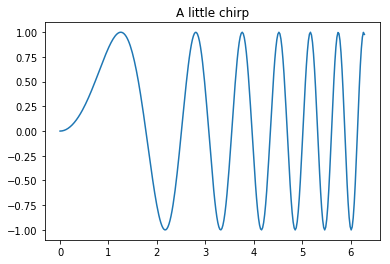

In [3]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x**2)
plt.plot(x, y)
plt.title("A little chirp")
fig = plt.gcf()  # let's keep the figure object around for later...

We can connect automatically a Qt Console to the currently running kernel with the `%qtconsole` magic, or by typing `ipython console --existing <kernel-UUID>` in any terminal: